In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = "./Dataset"  # 데이터셋이 저장된 경로
file_list = os.listdir(path)    # 데이터셋의 목록 읽어오기

actions = []    # 파일 확장자 빼고 제스처 이름만 저장
for i in range(len(file_list)) :
    actions.append(file_list[i][:-4])

seq_length = 10

In [3]:
# 제스처별로 전처리하고 훈련데이터 시험데이터 생성하기
datax, datay = [], []

# for i in range(1):
for i in range(len(file_list)):

    # 데이터프레임 읽고 변수, 라벨 분리
    df = pd.read_csv(f'{path}/{file_list[i]}', header=None)
    dfx = df.iloc[:, :-1].to_numpy()
    dfy = df.iloc[:, -1].to_numpy()

    # 시퀀스길이에 따라 시퀀스데이터로 변환
    for i in range(len(df) - seq_length):
        datax.append(dfx[i: i + seq_length])
        datay.append(dfy[i + seq_length])

In [4]:
# # 정답지 원-핫 인코딩
# from keras.utils.np_utils import to_categorical
# datay = to_categorical(datay, num_classes=len(actions))

# 문제지 정답지 타입 변환
datax = np.array(datax)
datay = np.array(datay)

In [5]:
# 훈련데이터 시험데이터 분리
xtrain, xtest, ytrain, ytest = train_test_split(datax, datay, test_size=0.1)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(342, 10, 15) (39, 10, 15) (342,) (39,)


In [5]:
from keras.models import Sequential
from keras import layers, callbacks

In [6]:
import time
start_time = time.time()

In [69]:
epochs=20

In [70]:
start_time = time.time()

model1 = Sequential([
    layers.SimpleRNN(64, input_shape=xtrain.shape[1:], activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model1.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist1 = model1.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score1 = model1.evaluate(xtest, ytest)
time1 = time.time() - start_time

2/2 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000


In [71]:
start_time = time.time()

model2 = Sequential([
    layers.SimpleRNN(64, input_shape=xtrain.shape[1:], activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model2.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist2 = model2.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score2 = model2.evaluate(xtest, ytest)
time2 = time.time() - start_time

2/2 [==============================] - 0s 973us/step - loss: 0.0335 - accuracy: 1.0000


In [72]:
start_time = time.time()

model3 = Sequential([
    layers.LSTM(64, input_shape=xtrain.shape[1:], activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model3.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist3 = model3.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score3 = model3.evaluate(xtest, ytest)
time3 = time.time() - start_time

2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000


In [73]:
start_time = time.time()

model4 = Sequential([
    layers.LSTM(64, input_shape=xtrain.shape[1:], activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model4.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist4 = model4.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score4 = model4.evaluate(xtest, ytest)
time4 = time.time() - start_time

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000


In [74]:
start_time = time.time()

model5 = Sequential([
    layers.GRU(64, input_shape=xtrain.shape[1:], activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model5.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist5 = model5.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score5 = model5.evaluate(xtest, ytest)
time5 = time.time() - start_time

2/2 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000


In [75]:
start_time = time.time()

model6 = Sequential([
    layers.GRU(64, input_shape=xtrain.shape[1:], activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint = callbacks.ModelCheckpoint('./Models/model6.h5', save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

hist6 = model6.fit(
                    xtrain, ytrain,
                    validation_split=0.2,
                    epochs = epochs,
                    callbacks = [checkpoint, earlystopping],
                    verbose=0
                )

score6 = model6.evaluate(xtest, ytest)
time6 = time.time() - start_time

2/2 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000


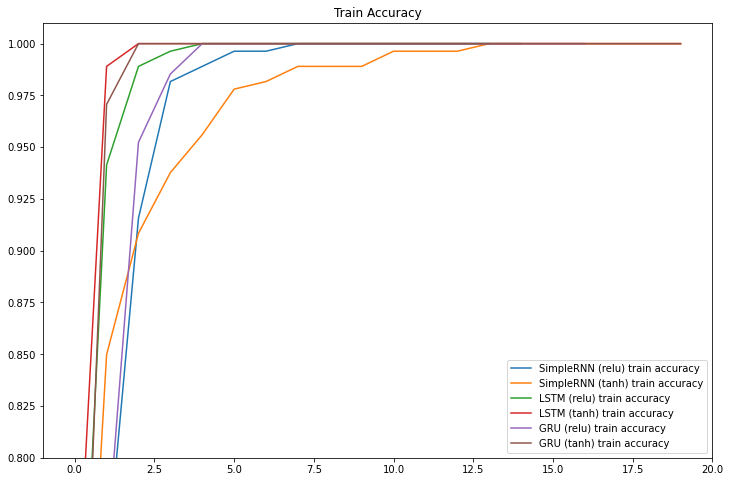

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(hist1.history['accuracy'], label='SimpleRNN (relu) train accuracy')
plt.plot(hist2.history['accuracy'], label='SimpleRNN (tanh) train accuracy')
plt.plot(hist3.history['accuracy'], label='LSTM (relu) train accuracy')
plt.plot(hist4.history['accuracy'], label='LSTM (tanh) train accuracy')
plt.plot(hist5.history['accuracy'], label='GRU (relu) train accuracy')
plt.plot(hist6.history['accuracy'], label='GRU (tanh) train accuracy')

plt.ylim(0.8, 1.01)
plt.xlim(-1,epoch)

plt.title('Train Accuracy')
plt.legend(), plt.grid
plt.show()


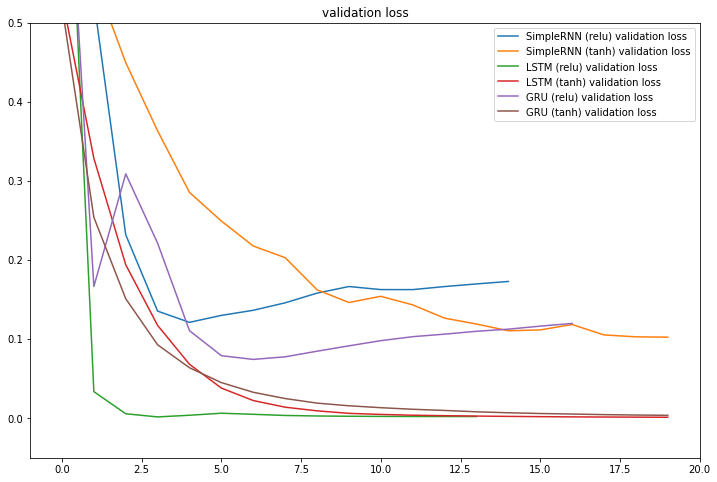

In [77]:
plt.figure(figsize=(12,8))

plt.plot(hist1.history['val_loss'], label='SimpleRNN (relu) validation loss')
plt.plot(hist2.history['val_loss'], label='SimpleRNN (tanh) validation loss')
plt.plot(hist3.history['val_loss'], label='LSTM (relu) validation loss')
plt.plot(hist4.history['val_loss'], label='LSTM (tanh) validation loss')
plt.plot(hist5.history['val_loss'], label='GRU (relu) validation loss')
plt.plot(hist6.history['val_loss'], label='GRU (tanh) validation loss')

plt.ylim(-0.05, 0.5)
plt.xlim(-1,epoch)

plt.title('validation loss')
plt.legend(), plt.grid
plt.show()

In [80]:
print('epochs : ', epoch)
print('SimpleRNN (relu) Test score & Time :\t', score1, '\t', time1)
print('SimpleRNN (tanh) Test score & Time :\t', score2, '\t', time2)
print('LSTM (relu) Test score & Time :\t', score3, '\t', time3)
print('LSTM (tanh) Test score & Time :\t', score4, '\t', time4)
print('GRU (relu) Test score & Time :\t', score5, '\t', time5)
print('GRU (tanh) Test score & Time :\t', score6, '\t', time6)

epochs :  20
SimpleRNN (relu) Test score & Time :	 [0.00694297906011343, 1.0] 	 1.4378931522369385
SimpleRNN (tanh) Test score & Time :	 [0.03348327428102493, 1.0] 	 1.7537953853607178
LSTM (relu) Test score & Time :	 [0.002484626369550824, 1.0] 	 1.801140308380127
LSTM (tanh) Test score & Time :	 [0.0012130517279729247, 1.0] 	 3.54757022857666
GRU (relu) Test score & Time :	 [0.01693663001060486, 1.0] 	 1.9968066215515137
GRU (tanh) Test score & Time :	 [0.004146185237914324, 1.0] 	 3.191608428955078


In [68]:
del model1, hist1
del model2, hist2
del model3, hist3
del model4, hist4
del model5, hist5
del model6, hist6

In [81]:
model = Sequential([
    layers.LSTM(64, input_shape=xtrain.shape[1:], activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                20480     
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 3)                 99        
                                                                 
Total params: 22,659
Trainable params: 22,659
Non-trainable params: 0
_________________________________________________________________


In [82]:
model = Sequential([
    layers.GRU(64, input_shape=xtrain.shape[1:], activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(actions), activation='softmax')
])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 64)                15552     
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dense_65 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,731
Trainable params: 17,731
Non-trainable params: 0
_________________________________________________________________


In [8]:
ytest.shape

(39,)